#  Corona vaccine progress 

version 1.0 created by Magnus Sälgö [twitter](https://twitter.com/salgo60), [Linked in](https://www.linkedin.com/in/magnus-s%C3%A4lg%C3%B6-148890/)

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) / [repository](https://github.com/salgo60/CoronaVaccinationCheck) 

* read the data from [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data) and Wikidata
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2021-01-14 21:49:42.342073


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountriesGitHub = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
GITHUB_location_csv = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations.csv"  
countries_csv = pd.read_csv(GITHUB_location_csv)  


In [4]:
countries_csv

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Argentina,ARG,Sputnik V,2021-01-13,Government of Argentina,https://www.argentina.gob.ar/noticias/continua...
1,Austria,AUT,Pfizer/BioNTech,2021-01-14,Ministry of Health,https://info.gesundheitsministerium.gv.at/data...
2,Bahrain,BHR,"Pfizer/BioNTech, Sinopharm",2021-01-13,Ministry of Health,https://twitter.com/MOH_Bahrain/status/1349446...
3,Belgium,BEL,Pfizer/BioNTech,2021-01-14,Regional governments via covid-vaccinatie.be,https://covid-vaccinatie.be/en
4,Bulgaria,BGR,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://coronavirus.bg/bg/statistika
5,Canada,CAN,"Moderna, Pfizer/BioNTech",2021-01-13,COVID-19 Canada Open Data Working Group,https://github.com/ishaberry/Covid19Canada
6,Chile,CHL,Pfizer/BioNTech,2021-01-06,Department of Statistics and Health Information,https://informesdeis.minsal.cl/SASVisualAnalyt...
7,China,CHN,"CNBG, Sinovac",2021-01-13,National Health Commission,https://www.chinadaily.com.cn/a/202101/13/WS5f...
8,Costa Rica,CRI,Pfizer/BioNTech,2021-01-08,National Health Commission,https://www.ccss.sa.cr/noticias/servicios_noti...
9,Croatia,HRV,Pfizer/BioNTech,2021-01-14,Ministry of Health,https://www.24sata.hr/news/vlada-o-obnovi-zgra...


In [5]:
#order by last updated ascending
countries_csv = countries_csv.sort_values(by=['last_observation_date'],ascending=False)
#countries_csv.reindex(["location"])
countries_csv.reset_index(drop=True, inplace=True)
countries_csv

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Israel,ISR,Pfizer/BioNTech,2021-01-14,Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
1,Greece,GRC,Pfizer/BioNTech,2021-01-14,Ministry of Health,https://www.data.gov.gr/datasets/mdg_emvolio/
2,France,FRA,Pfizer/BioNTech,2021-01-14,Ministry of Health,https://www.data.gouv.fr/fr/datasets/donnees-r...
3,Finland,FIN,Pfizer/BioNTech,2021-01-14,THL via Helsingin Sanomat,https://github.com/HS-Datadesk/koronavirus-avo...
4,Estonia,EST,Pfizer/BioNTech,2021-01-14,National Health Board,https://www.terviseamet.ee/et/uudised
5,Italy,ITA,Pfizer/BioNTech,2021-01-14,Extraordinary commissioner for the Covid-19 em...,https://github.com/italia/covid19-opendata-vac...
6,Romania,ROU,Pfizer/BioNTech,2021-01-14,Government of Romania,https://vaccinare-covid.gov.ro/comunicate-ofic...
7,Slovakia,SVK,Pfizer/BioNTech,2021-01-14,Ministry of Health,https://korona.gov.sk/koronavirus-na-slovensku...
8,Croatia,HRV,Pfizer/BioNTech,2021-01-14,Ministry of Health,https://www.24sata.hr/news/vlada-o-obnovi-zgra...
9,Austria,AUT,Pfizer/BioNTech,2021-01-14,Ministry of Health,https://info.gesundheitsministerium.gv.at/data...


## Latest reported

In [6]:
# merge allCountriesGitHub with all Countries_csv
allCountries = pd.merge(allCountriesGitHub,countries_csv,how='outer',on="location",indicator=True)
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:20]

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,iso_code,vaccines,last_observation_date,source_name,source_website,_merge
262,Israel,2021-01-14,Pfizer/BioNTech,https://datadashboard.health.gov.il/COVID-19/g...,2122778,1969345.0,153433,ISR,Pfizer/BioNTech,2021-01-14,Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,both
13,Austria,2021-01-14,Pfizer/BioNTech,https://datadashboard.health.gov.il/COVID-19/g...,74100,74100.0,0,AUT,Pfizer/BioNTech,2021-01-14,Ministry of Health,https://info.gesundheitsministerium.gv.at/data...,both
176,France,2021-01-14,Pfizer/BioNTech,https://solidarites-sante.gouv.fr/actualites/p...,318216,318216.0,0,FRA,Pfizer/BioNTech,2021-01-14,Ministry of Health,https://www.data.gouv.fr/fr/datasets/donnees-r...,both
463,Turkey,2021-01-14,Sinovac,https://covid19asi.saglik.gov.tr/,279452,279452.0,0,TUR,Sinovac,2021-01-14,COVID-19 Vaccine Information Platform,https://covid19asi.saglik.gov.tr/,both
472,United Arab Emirates,2021-01-14,"Pfizer/BioNTech, Sinopharm",https://twitter.com/NCEMAUAE/status/1349687631...,1527833,1277833.0,250000,ARE,"Pfizer/BioNTech, Sinopharm",2021-01-14,National Emergency Crisis and Disaster Managem...,https://twitter.com/NCEMAUAE,both
46,Belgium,2021-01-14,Pfizer/BioNTech,https://covid-vaccinatie.be/en,68968,68968.0,0,BEL,Pfizer/BioNTech,2021-01-14,Regional governments via covid-vaccinatie.be,https://covid-vaccinatie.be/en,both
462,Switzerland,2021-01-14,Pfizer/BioNTech,https://twitter.com/srfnews/status/13497272413...,66000,66000.0,0,CHE,Pfizer/BioNTech,2021-01-14,Federal Office of Public Health,https://twitter.com/srfnews/status/13497272413...,both
110,Croatia,2021-01-14,Pfizer/BioNTech,https://www.24sata.hr/news/vlada-o-obnovi-zgra...,38000,38000.0,0,HRV,Pfizer/BioNTech,2021-01-14,Ministry of Health,https://www.24sata.hr/news/vlada-o-obnovi-zgra...,both
281,Italy,2021-01-14,Pfizer/BioNTech,https://github.com/italia/covid19-opendata-vac...,908989,908989.0,0,ITA,Pfizer/BioNTech,2021-01-14,Extraordinary commissioner for the Covid-19 em...,https://github.com/italia/covid19-opendata-vac...,both
458,Spain,2021-01-14,Pfizer/BioNTech,https://www.mscbs.gob.es/profesionales/saludPu...,676186,676186.0,0,ESP,Pfizer/BioNTech,2021-01-14,Ministry of Health,https://www.mscbs.gob.es/profesionales/saludPu...,both


In [7]:
#Countries in list
allCountries["location"].value_counts()

Canada                  31
Israel                  27
Bahrain                 22
Italy                   19
Greece                  18
Germany                 18
Romania                 18
Denmark                 18
Estonia                 17
Poland                  16
Oman                    16
United States           16
Norway                  15
Lithuania               15
Mexico                  15
Hungary                 13
Latvia                  13
France                  11
Belgium                 11
Slovenia                11
Bulgaria                11
United Arab Emirates     9
Austria                  9
Finland                  9
Netherlands              8
Croatia                  8
Spain                    8
Northern Ireland         7
Wales                    7
Chile                    7
Scotland                 7
Slovakia                 7
United Kingdom           6
Portugal                 6
England                  6
Ireland                  5
Argentina                5
C

In [8]:
allCountries.groupby(["location", "vaccine"]).size()

location        vaccine                            
Argentina       Sputnik V                               5
Austria         Pfizer/BioNTech                         9
Bahrain         Pfizer/BioNTech, Sinopharm             22
Belgium         Pfizer/BioNTech                        11
Bulgaria        Pfizer/BioNTech                        11
                                                       ..
United Kingdom  Pfizer/BioNTech                         3
United States   Moderna, Pfizer/BioNTech               14
                Pfizer/BioNTech                         2
Wales           Oxford/AstraZeneca, Pfizer/BioNTech     3
                Pfizer/BioNTech                         4
Length: 63, dtype: int64

In [9]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 0 to 494
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 475 non-null    object        
 1   date                     475 non-null    datetime64[ns]
 2   vaccine                  475 non-null    object        
 3   source_url               475 non-null    object        
 4   total_vaccinations       475 non-null    int64         
 5   people_vaccinated        471 non-null    float64       
 6   people_fully_vaccinated  475 non-null    int64         
 7   iso_code                 475 non-null    object        
 8   vaccines                 475 non-null    object        
 9   last_observation_date    475 non-null    object        
 10  source_name              475 non-null    object        
 11  source_website           475 non-null    object        
 12  _merge                   475 non-nul

In [78]:
#Reported numbers are accumulated --> get latest
plotLatestCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','people_vaccinated','people_fully_vaccinated','location','vaccine','iso_code']].groupby('location').apply(lambda x: x.head(1))
plotLatestCountries = plotLatestCountries.set_index('location')
worldtotal_vaccinations_str = '{:,}'.format(plotLatestCountries.sum()["total_vaccinations"]).replace(',', ' ')
worldfully_vaccinations_str = '{:,}'.format(plotLatestCountries.sum()["people_fully_vaccinated"]).replace(',', ' ')
titlestring = "Total Vaccination: " + worldtotal_vaccinations_str + " fully: " + worldfully_vaccinations_str + " "
print(titlestring, plotLatestCountries.shape)


Total Vaccination: 34 467 125 fully: 831 665  (50, 5)


## Charts

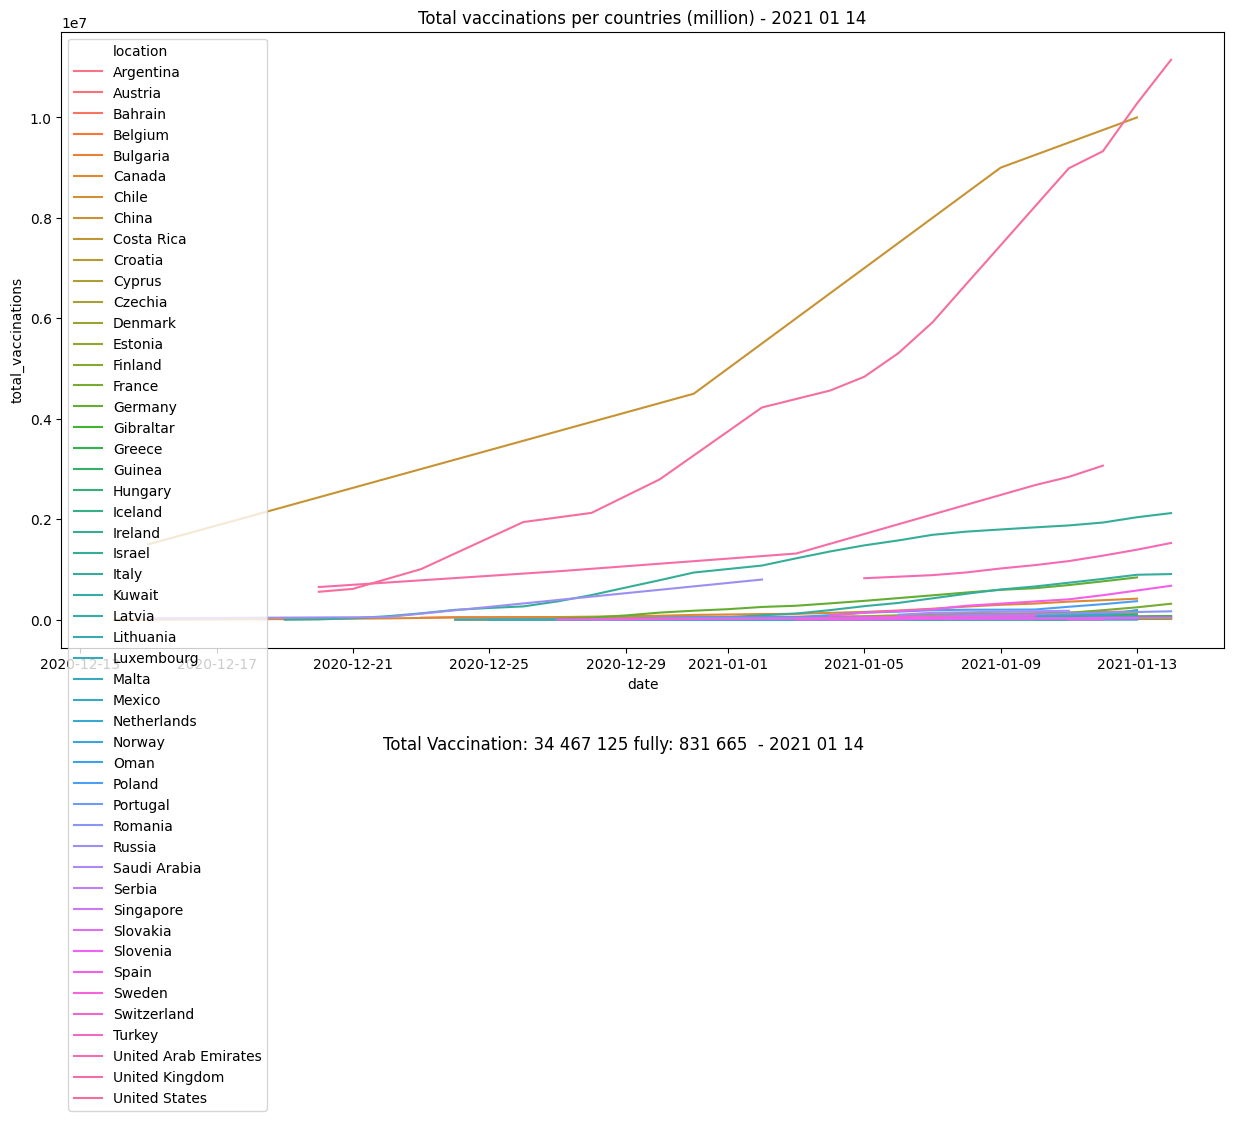

In [79]:
# plot all values = allCountriesFiltered
%matplotlib inline    
import matplotlib.pyplot as plt   
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 8.0)

sns.lineplot(data=allCountriesFiltered, x="date", y="total_vaccinations", hue="location" )
plt.title("Total vaccinations per countries (million) - " + start_time.strftime('%Y %m %d'))
plt.suptitle(titlestring + " - " + start_time.strftime('%Y %m %d'),y=0)

plt.savefig('images/Corona_Line.png',bbox_inches='tight')  
plt.show() 


In [82]:
plotLatestFullyCountries = plotLatestCountries[plotLatestCountries[people_fully_vaccinated] > 0]]

SyntaxError: unmatched ']' (<ipython-input-82-20080b65888f>, line 1)

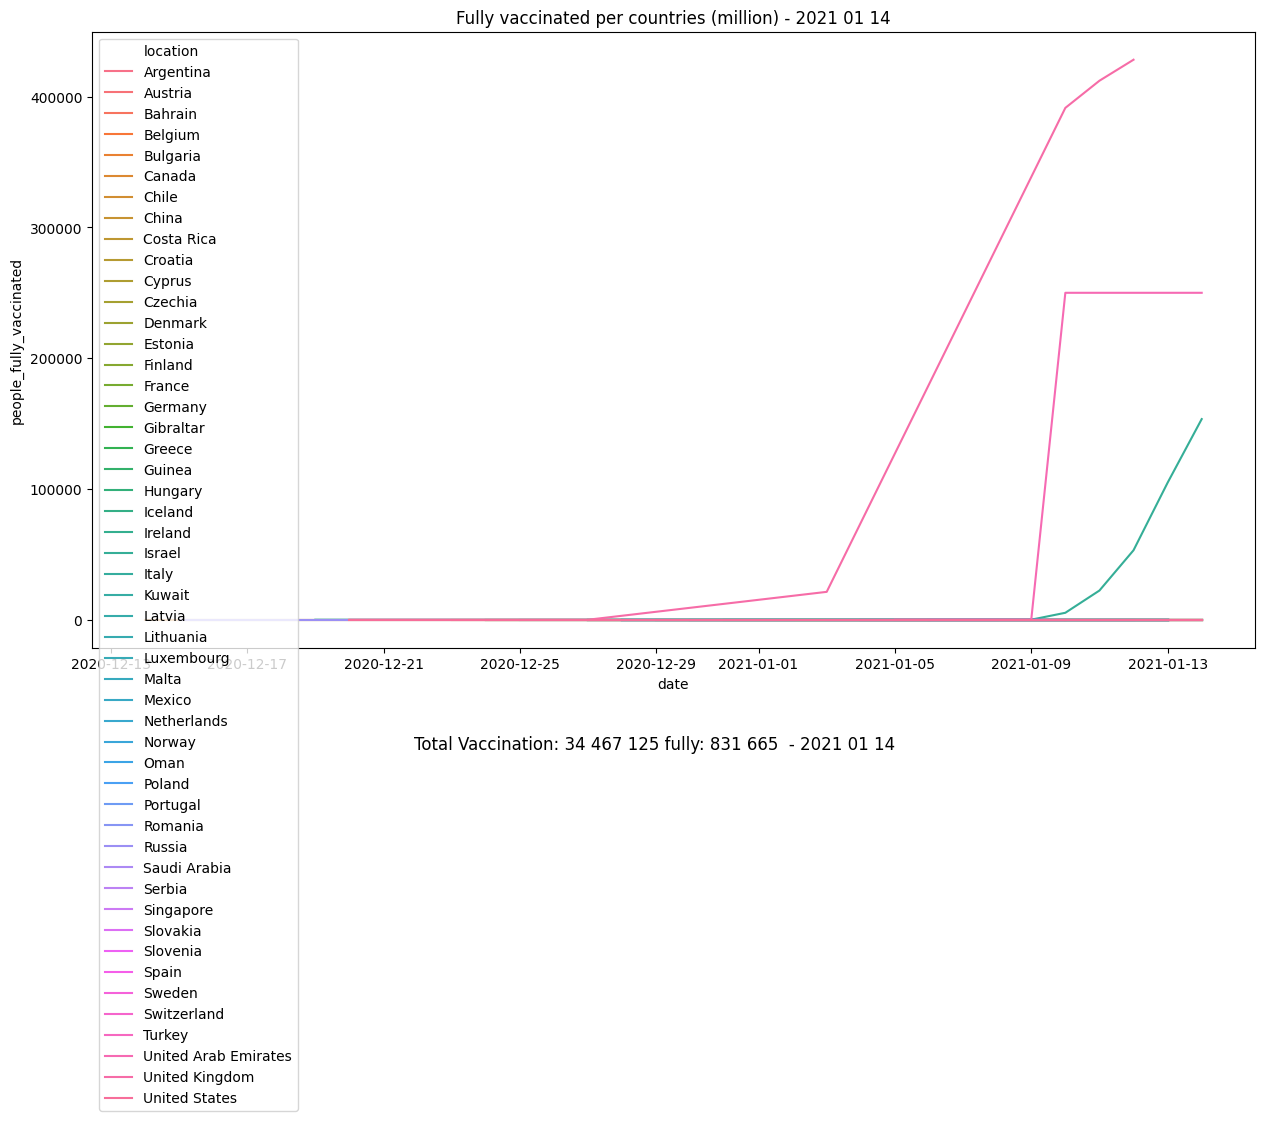

In [80]:
# plot all values = allCountriesFiltered
%matplotlib inline    
import matplotlib.pyplot as plt   
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 8.0)

sns.lineplot(data=allCountriesFiltered, x="date", y="people_fully_vaccinated", hue="location" )
plt.title("Fully vaccinated per countries (million) - " + start_time.strftime('%Y %m %d'))
plt.suptitle(titlestring + " - " + start_time.strftime('%Y %m %d'),y=0)

plt.savefig('images/CoronaFully_Line.png',bbox_inches='tight')  
plt.show() 


In [12]:
allCountriesFiltered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 0 to 494
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 475 non-null    object        
 1   date                     475 non-null    datetime64[ns]
 2   vaccine                  475 non-null    object        
 3   source_url               475 non-null    object        
 4   total_vaccinations       475 non-null    int64         
 5   people_vaccinated        471 non-null    float64       
 6   people_fully_vaccinated  475 non-null    int64         
 7   iso_code                 475 non-null    object        
 8   vaccines                 475 non-null    object        
 9   last_observation_date    475 non-null    object        
 10  source_name              475 non-null    object        
 11  source_website           475 non-null    object        
 12  _merge                   475 non-nul

In [75]:
allCountriesFiltered

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,iso_code,vaccines,last_observation_date,source_name,source_website,_merge
0,Argentina,2020-12-29,Sputnik V,https://www.argentina.gob.ar/noticias/ministro...,700,700.0,0,ARG,Sputnik V,2021-01-13,Government of Argentina,https://www.argentina.gob.ar/noticias/continua...,both
1,Argentina,2020-12-31,Sputnik V,https://www.argentina.gob.ar/sites/default/fil...,32013,32013.0,0,ARG,Sputnik V,2021-01-13,Government of Argentina,https://www.argentina.gob.ar/noticias/continua...,both
2,Argentina,2021-01-04,Sputnik V,https://www.argentina.gob.ar/sites/default/fil...,39599,39599.0,0,ARG,Sputnik V,2021-01-13,Government of Argentina,https://www.argentina.gob.ar/noticias/continua...,both
3,Argentina,2021-01-08,Sputnik V,https://www.argentina.gob.ar/noticias/ya-se-ap...,107542,107542.0,0,ARG,Sputnik V,2021-01-13,Government of Argentina,https://www.argentina.gob.ar/noticias/continua...,both
4,Argentina,2021-01-13,Sputnik V,https://www.argentina.gob.ar/noticias/continua...,166833,166833.0,0,ARG,Sputnik V,2021-01-13,Government of Argentina,https://www.argentina.gob.ar/noticias/continua...,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,United States,2021-01-08,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,6688231,6688231.0,0,USA,"Moderna, Pfizer/BioNTech",2021-01-14,Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,both
491,United States,2021-01-11,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,8987322,8987322.0,0,USA,"Moderna, Pfizer/BioNTech",2021-01-14,Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,both
492,United States,2021-01-12,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,9327138,9327138.0,0,USA,"Moderna, Pfizer/BioNTech",2021-01-14,Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,both
493,United States,2021-01-13,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,10278462,10278462.0,0,USA,"Moderna, Pfizer/BioNTech",2021-01-14,Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,both


In [13]:
# Resample dates Forward filling and sum

#allCountriesFiltered
#grouper = allCountriesFiltered.groupby([pd.Grouper(key="date",freq='1D'), 'location']).mean() 


In [74]:
people_fully_vaccinated
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (5, 5)
plotLatestCountries["people_fully_vaccinated"].plot( y='location',kind = 'pie') 
plt.title("Fully vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Fully Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_FuVaccinationperCountry.png')  
plt.show() 


NameError: name 'people_fully_vaccinated' is not defined

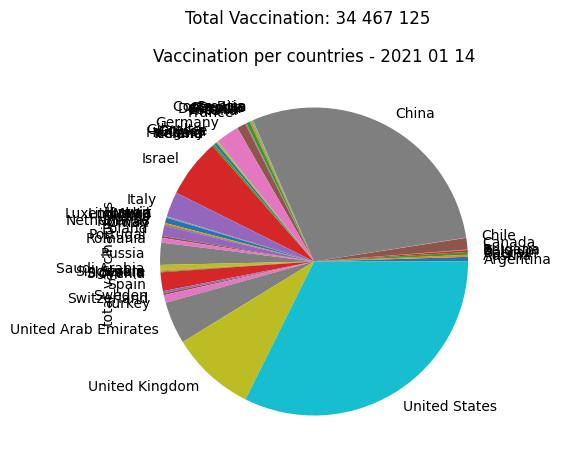

In [14]:
# Plot filtered
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (5, 5)
plotLatestCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperCountry.png')  
plt.show() 


In [15]:
plotLatestCountries.sort_values(by='total_vaccinations',ascending=False)

,total_vaccinations,vaccine,iso_code
location,,,
United States,11148991,"Moderna, Pfizer/BioNTech",USA
China,10000000,"CNBG, Sinovac",CHN
United Kingdom,3067541,"Oxford/AstraZeneca, Pfizer/BioNTech",GBR
Israel,2122778,Pfizer/BioNTech,ISR
United Arab Emirates,1527833,"Pfizer/BioNTech, Sinopharm",ARE
Italy,908989,Pfizer/BioNTech,ITA
Germany,842455,"Moderna, Pfizer/BioNTech",DEU
Russia,800000,Sputnik V,RUS
Spain,676186,Pfizer/BioNTech,ESP


In [16]:
plotLatestCountries.shape

(50, 3)

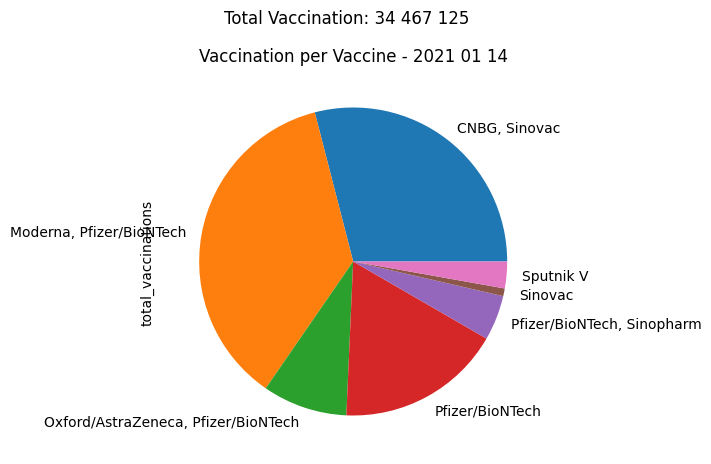

In [17]:
# Vaccine numbers
plotVaccine = plotLatestCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperVaccine.png')  
plt.show()

In [18]:
plotVaccine.sort_values(ascending=True)

vaccine
Sinovac                                  279452
Sputnik V                                966858
Pfizer/BioNTech, Sinopharm              1629196
Oxford/AstraZeneca, Pfizer/BioNTech     3067541
Pfizer/BioNTech                         5984253
CNBG, Sinovac                          10000000
Moderna, Pfizer/BioNTech               12539825
Name: total_vaccinations, dtype: int64

In [19]:
# Sweden have 10 000 doses....
#allCountries

In [20]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-14 21:49:59.778757
Time elapsed (hh:mm:ss.ms) 0:00:17.436800


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata


In [21]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/sp8
# see also https://www.wikidata.org/wiki/Wikidata:Project_chat#Brexit_in_Wikidata
queryWD = """SELECT DISTINCT ?cid  (SAMPLE(?continent) AS ?continent)  (SAMPLE(?memberEU) AS ?memberEU) ?country 
(REPLACE(STR(?cid), ".*Q", "Q") AS ?qid) ?population ?ISO3166_1 ?nominalGDPperCapita
?G20 ?IMF (sample(?genderH) AS ?genderH)
WHERE {
  ?cid wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?cid wdt:P298 ?ISO3166_1 }
  OPTIONAL { ?cid wdt:P2132 ?nominalGDPperCapita }
  ?cid wdt:P6/wdt:P21 ?gHead # gender head of gov
  BIND (exists{?cid wdt:P463 wd:Q458} && not exists{?cid p:P463 [ ps:P463 wd:Q458 ; pq:P582 [] ]} AS ?memberEU)
  BIND (exists{?cid wdt:P463 wd:Q19771} && not exists{?cid p:P463 [ ps:P463 wd:Q19771 ; pq:P582 [] ]} AS ?G20)
  BIND (exists{?cid wdt:P463 wd:Q7804} && not exists{?cid p:P463 [ ps:P463 wd:Q7804 ; pq:P582 [] ]} AS ?IMF)
  {?cid wdt:P30 ?contid}
  OPTIONAL {
    ?contid rdfs:label ?continent.
    FILTER((LANG(?continent)) = "en")
    ?cid rdfs:label ?country.
    FILTER((LANG(?country)) = "en")
    ?gHead rdfs:label ?genderH.
    FILTER((LANG(?genderH)) = "en")

  }
FILTER ( ?cid  not in ( wd:Q756617 ) ) #Danish Realm
}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index ?cid 
 ?G20 ?IMF """


def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cid                  194 non-null    object
 1   continent            194 non-null    object
 2   memberEU             194 non-null    object
 3   country              194 non-null    object
 4   qid                  194 non-null    object
 5   population           194 non-null    object
 6   ISO3166_1            194 non-null    object
 7   nominalGDPperCapita  191 non-null    object
 8   G20                  194 non-null    object
 9   IMF                  194 non-null    object
 10  genderH              194 non-null    object
dtypes: object(11)
memory usage: 16.8+ KB


In [22]:
WDpopulation.sample(5)

,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH
186,http://www.wikidata.org/entity/Q217,Europe,false,Moldova,Q217,2550900,MDA,2290,false,false,male
95,http://www.wikidata.org/entity/Q29999,Europe,true,Kingdom of the Netherlands,Q29999,17100715,NLD,None,false,false,male
190,http://www.wikidata.org/entity/Q236,Europe,false,Montenegro,Q236,622359,MNE,7784,false,false,male
58,http://www.wikidata.org/entity/Q211,Europe,true,Latvia,Q211,1909000,LVA,15684,false,false,male
117,http://www.wikidata.org/entity/Q778,North America,false,The Bahamas,Q778,395361,BHS,30762,false,false,male


In [23]:
plotLatestCountries

,total_vaccinations,vaccine,iso_code
location,,,
Argentina,166833,Sputnik V,ARG
Austria,74100,Pfizer/BioNTech,AUT
Bahrain,101363,"Pfizer/BioNTech, Sinopharm",BHR
Belgium,68968,Pfizer/BioNTech,BEL
Bulgaria,17038,Pfizer/BioNTech,BGR
Canada,419209,"Moderna, Pfizer/BioNTech",CAN
Chile,10699,Pfizer/BioNTech,CHL
China,10000000,"CNBG, Sinovac",CHN
Costa Rica,9751,Pfizer/BioNTech,CRI


In [24]:
#plotCountriesPopulation = pd.merge(plotLatestCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
CountriesData = pd.merge(plotLatestCountries, WDpopulation,how='inner', left_on="iso_code", right_on="ISO3166_1" ,indicator=True)   
CountriesData

,total_vaccinations,vaccine,iso_code,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH,_merge
0,166833,Sputnik V,ARG,http://www.wikidata.org/entity/Q414,South America,false,Argentina,Q414,44938712,ARG,14398,true,false,male,both
1,74100,Pfizer/BioNTech,AUT,http://www.wikidata.org/entity/Q40,Europe,true,Austria,Q40,8809212,AUT,44920,false,false,male,both
2,101363,"Pfizer/BioNTech, Sinopharm",BHR,http://www.wikidata.org/entity/Q398,Asia,false,Bahrain,Q398,1492584,BHR,23739,false,false,male,both
3,68968,Pfizer/BioNTech,BEL,http://www.wikidata.org/entity/Q31,Europe,true,Belgium,Q31,11431406,BEL,43467,false,false,male,both
4,17038,Pfizer/BioNTech,BGR,http://www.wikidata.org/entity/Q219,Europe,true,Bulgaria,Q219,7000039,BGR,8228,false,false,male,both
5,419209,"Moderna, Pfizer/BioNTech",CAN,http://www.wikidata.org/entity/Q16,North America,false,Canada,Q16,37894799,CAN,44870,true,false,male,both
6,10699,Pfizer/BioNTech,CHL,http://www.wikidata.org/entity/Q298,South America,false,Chile,Q298,18054726,CHL,15346,false,false,male,both
7,10000000,"CNBG, Sinovac",CHN,http://www.wikidata.org/entity/Q148,Asia,false,People's Republic of China,Q148,1409517397,CHN,8826,true,false,male,both
8,9751,Pfizer/BioNTech,CRI,http://www.wikidata.org/entity/Q800,North America,false,Costa Rica,Q800,4905769,CRI,11677,false,false,male,both
9,38000,Pfizer/BioNTech,HRV,http://www.wikidata.org/entity/Q224,Europe,true,Croatia,Q224,4105493,HRV,13386,false,false,male,both


In [25]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(float)
CountriesData["memberEU"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['memberEU'] = CountriesData['memberEU'].astype(int)
# G20 IMF
CountriesData["G20"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G20'] = CountriesData['G20'].astype(int)
CountriesData["IMF"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['IMF'] = CountriesData['IMF'].astype(int)
CountriesData['genderFlag'] = CountriesData['genderH']
CountriesData["genderFlag"].replace({"male": "1", "female": "0"}, inplace=True)
CountriesData['genderFlag'] = CountriesData['genderFlag'].astype(int)

#"Correct United States of America
CountriesData["continent"].replace({"Oceania": "North America"}, inplace=True)
CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   total_vaccinations   49 non-null     int64   
 1   vaccine              49 non-null     object  
 2   iso_code             49 non-null     object  
 3   cid                  49 non-null     object  
 4   continent            49 non-null     object  
 5   memberEU             49 non-null     int64   
 6   country              49 non-null     object  
 7   qid                  49 non-null     object  
 8   population           49 non-null     int64   
 9   ISO3166_1            49 non-null     object  
 10  nominalGDPperCapita  48 non-null     float64 
 11  G20                  49 non-null     int64   
 12  IMF                  49 non-null     int64   
 13  genderH              49 non-null     object  
 14  _merge               49 non-null     category
 15  genderFlag           49 n

In [26]:
#CountriesData

In [27]:
CountriesData['Country'] = CountriesData.index

In [28]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100

correlations = CountriesData.corr()  
correlations["total_vaccinations"]

total_vaccinations                 1.000000
memberEU                          -0.284814
population                         0.781333
nominalGDPperCapita                0.057118
G20                                0.445666
IMF                                0.000425
genderFlag                         0.105765
Country                            0.140342
vaccinations_population_percent    0.194924
Name: total_vaccinations, dtype: float64

In [29]:
correlations["vaccinations_population_percent"]

total_vaccinations                 0.194924
memberEU                          -0.243426
population                        -0.037629
nominalGDPperCapita                0.129680
G20                               -0.073896
IMF                               -0.037820
genderFlag                         0.075772
Country                            0.114958
vaccinations_population_percent    1.000000
Name: vaccinations_population_percent, dtype: float64

In [30]:
# see https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
#plt.rcParams['figure.figsize'] = (8.0, 8.0)
#heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True)
#heatmap.set_title('Corona vaccinations Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


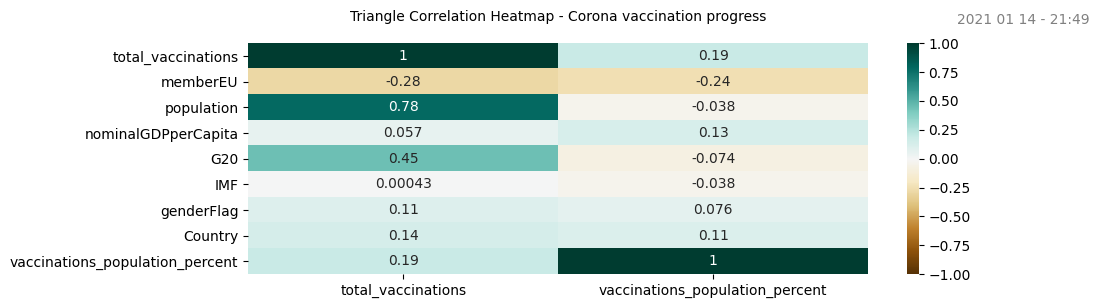

In [31]:
import numpy as np
plt.figure(figsize=(10, 3))
#np.triu(np.ones_like(correlations["total_vaccinations","vaccinations_population_percent"]))
#mask = np.triu(np.ones_like(correlations, dtype=np.bool))
heatmap = sns.heatmap(correlations[{"total_vaccinations","vaccinations_population_percent"}],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap - Corona vaccination progress', fontdict={'fontsize':10},y=0.9, pad=16);
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=10,color = 'gray',x=0.9)
plt.savefig('images/Correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show() 


In [32]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData[{"total_vaccinations","population","vaccinations_population_percent","continent",
               "memberEU","G20","IMF","country"}]

,total_vaccinations,vaccinations_population_percent,IMF,country,continent,population,memberEU,G20
22,2122778,23.345189,0,Israel,Asia,9093000,0,0
46,1527833,16.253292,0,United Arab Emirates,Asia,9400145,0,0
2,101363,6.791109,0,Bahrain,Asia,1492584,0,0
47,3067541,4.646221,0,United Kingdom,Europe,66022273,0,1
48,11148991,3.396602,0,United States of America,North America,328239523,0,1
12,129170,2.216573,0,Denmark,Europe,5827463,1,0
21,77303,1.623377,0,Ireland,Europe,4761865,1,0
23,908989,1.507020,1,Italy,Europe,60317000,1,1
42,676186,1.446912,0,Spain,Europe,46733038,1,0
41,29561,1.430223,0,Slovenia,Europe,2066880,1,0


## Vaccination numbers % of population

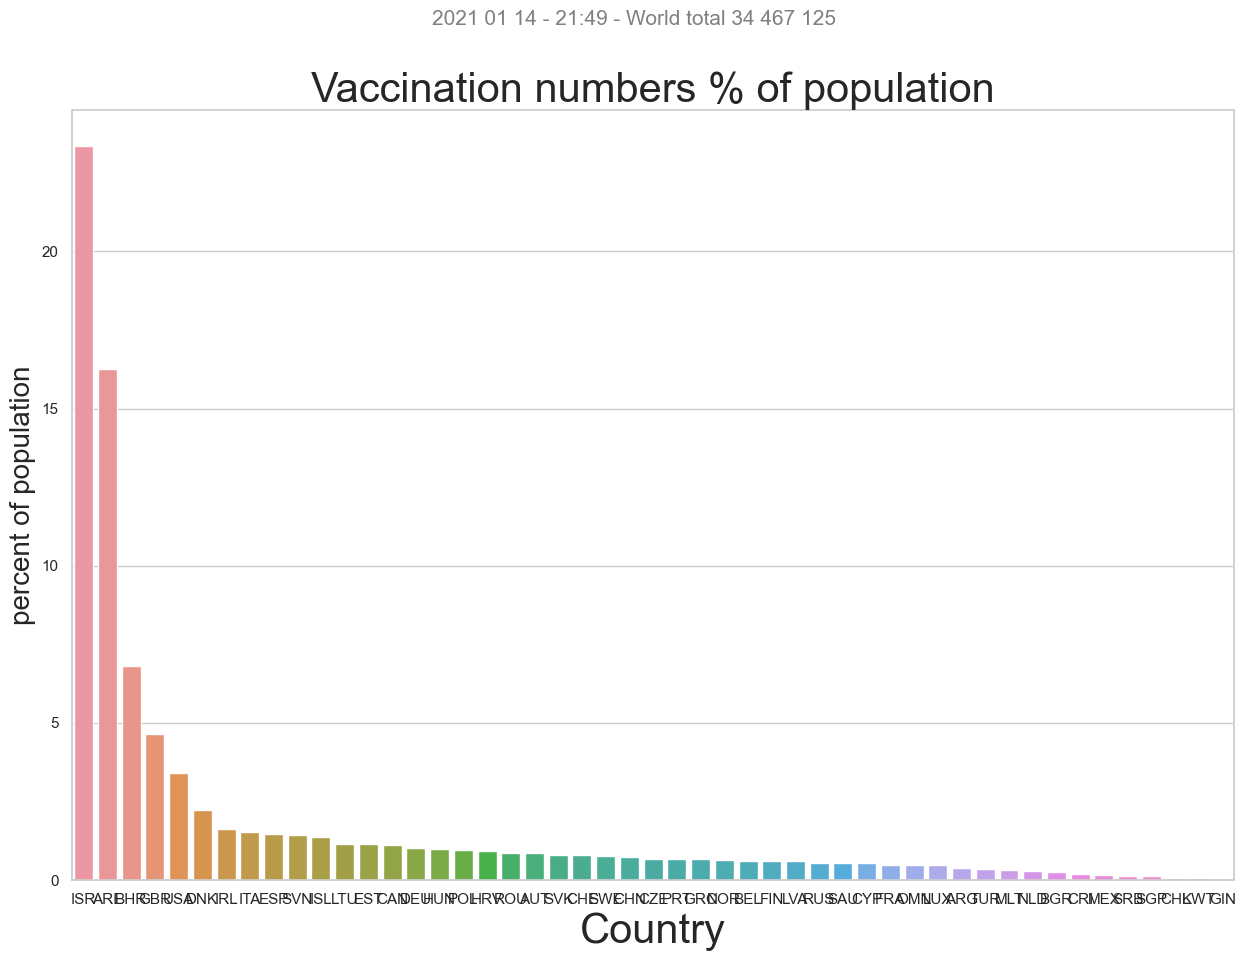

In [33]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData). \
            set_title("Vaccination numbers % of population", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_2.png",bbox_inches="tight")
plt.show() 

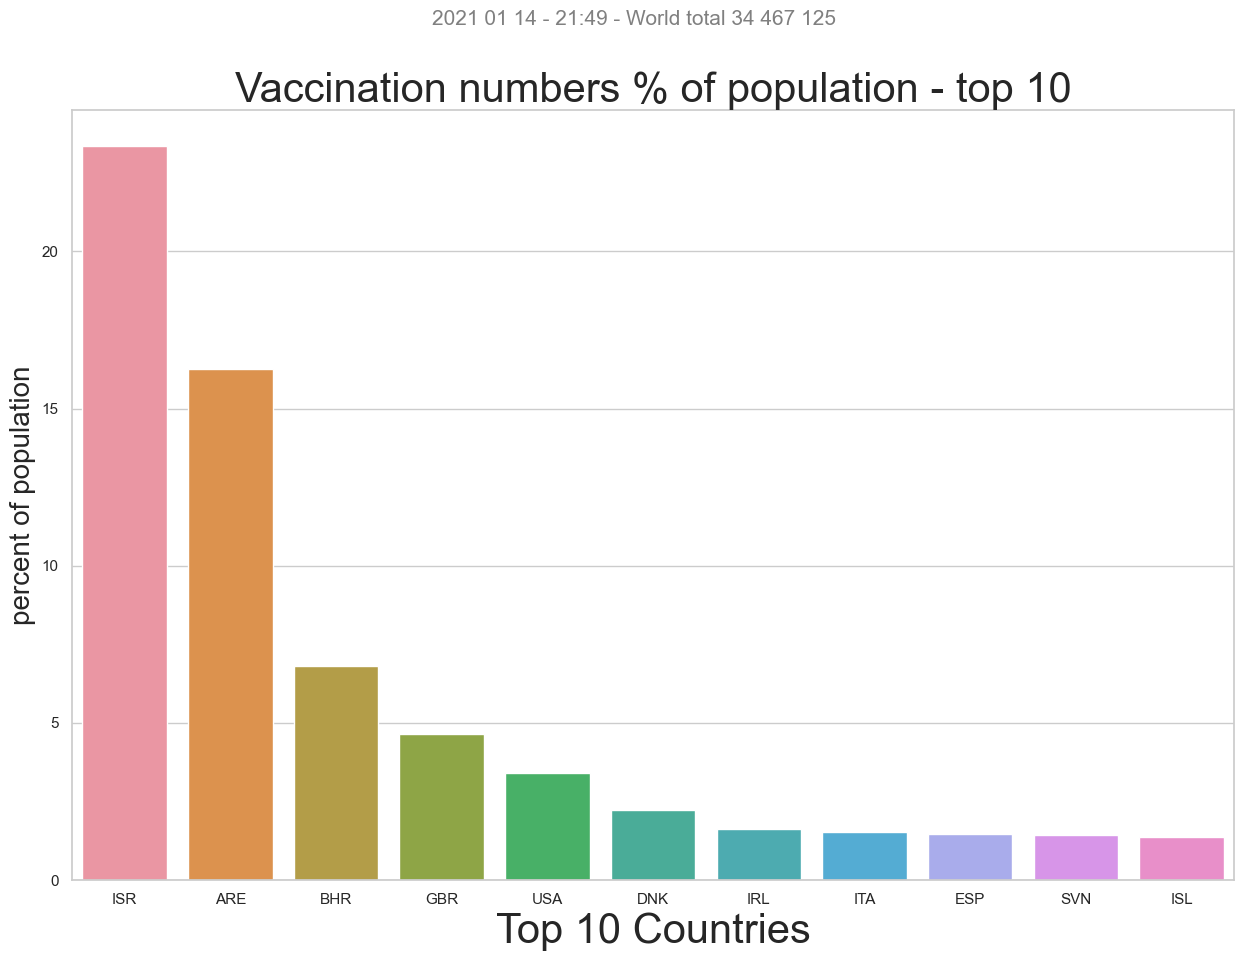

In [34]:
#Top 10 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[0:11]). \
            set_title("Vaccination numbers % of population - top 10", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Top 10 Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_1_10.png",bbox_inches="tight")
plt.show() 

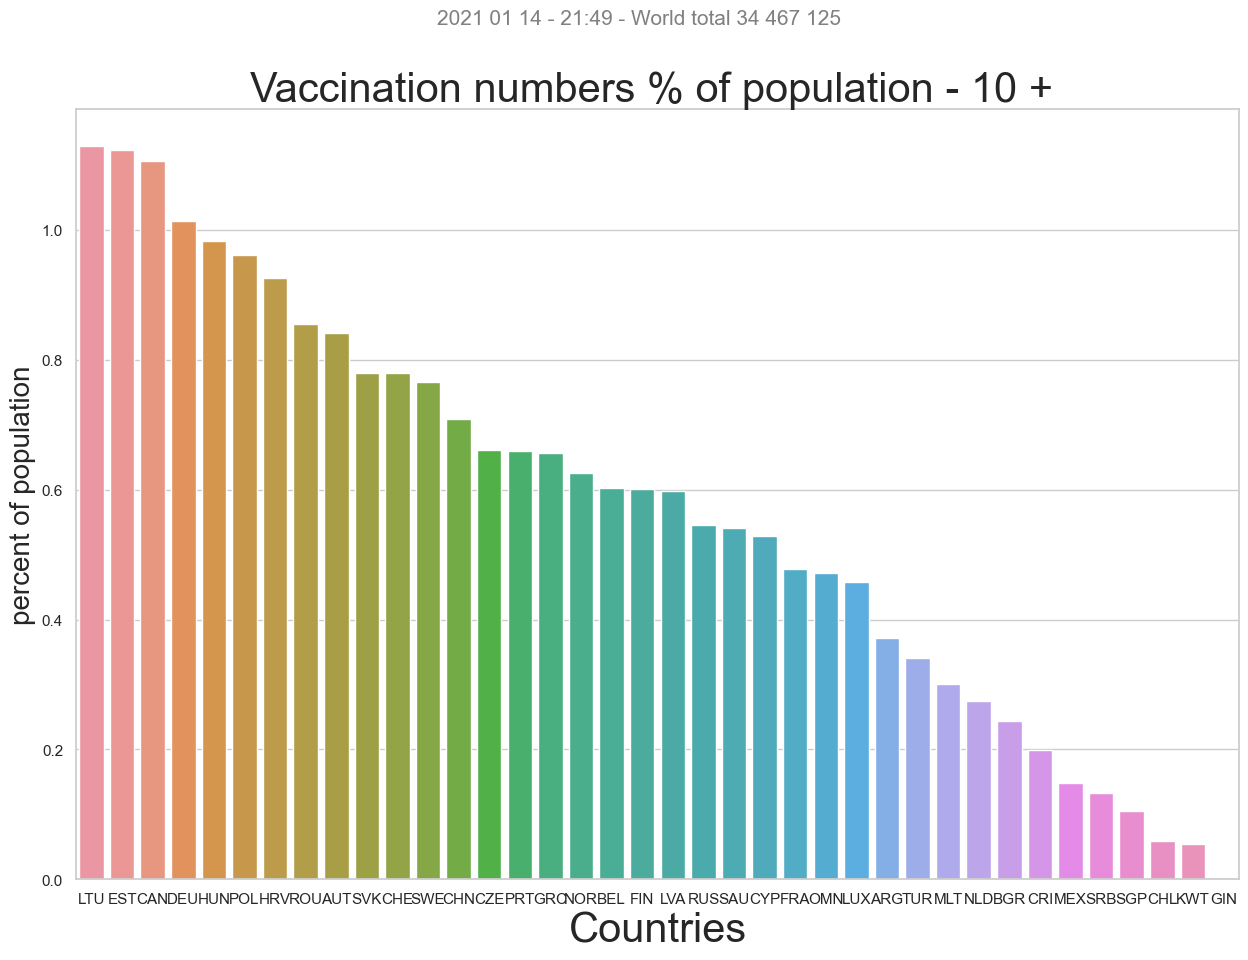

In [35]:
# 10-
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[11:]). \
            set_title("Vaccination numbers % of population - 10 + ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_10_.png",bbox_inches="tight")
plt.show() 

## Scatter plots

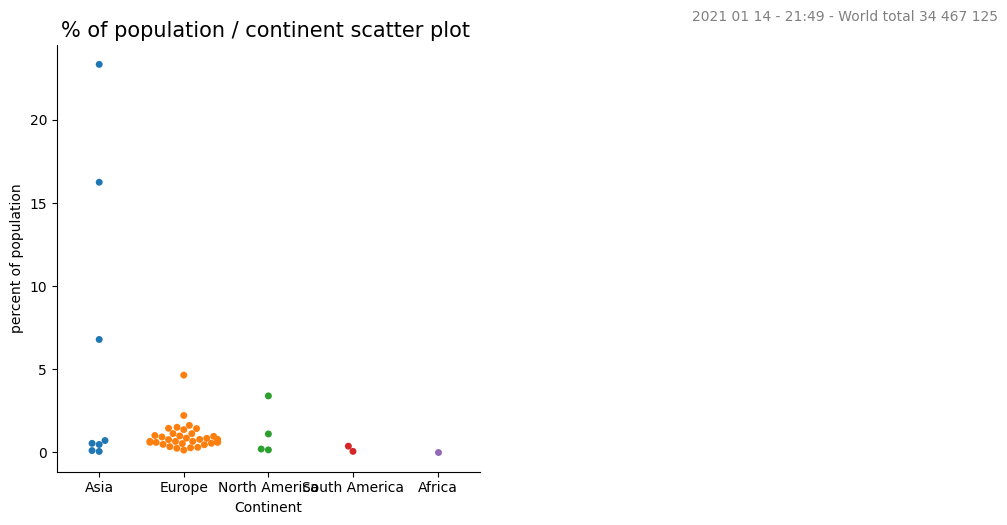

In [36]:
#https://seaborn.pydata.org/tutorial/categorical.html
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% of population / continent scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

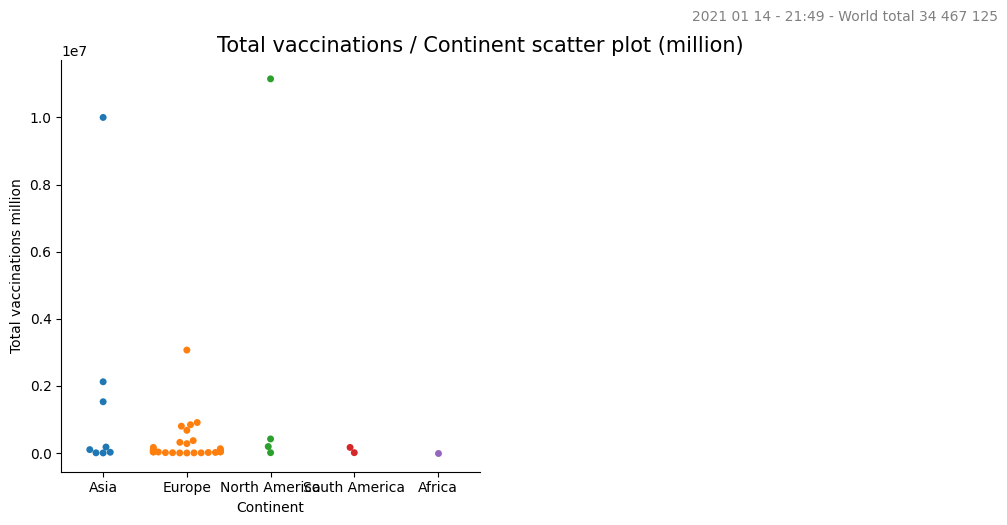

In [37]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="total_vaccinations", data=CountriesData,kind="swarm",legend='brief')
plt.title("Total vaccinations / Continent scatter plot (million)" , fontsize=15, x=1,y=1.1 )
plt.ylabel("Total vaccinations million",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryTotal_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [38]:
CountriesData["Member EU"] = CountriesData["memberEU"]
CountriesData["Member EU"] = CountriesData["Member EU"].astype(str)
CountriesData["Member EU"].replace({"1": "Member in EU", "0": "non Member"}, inplace=True)

#CountriesData

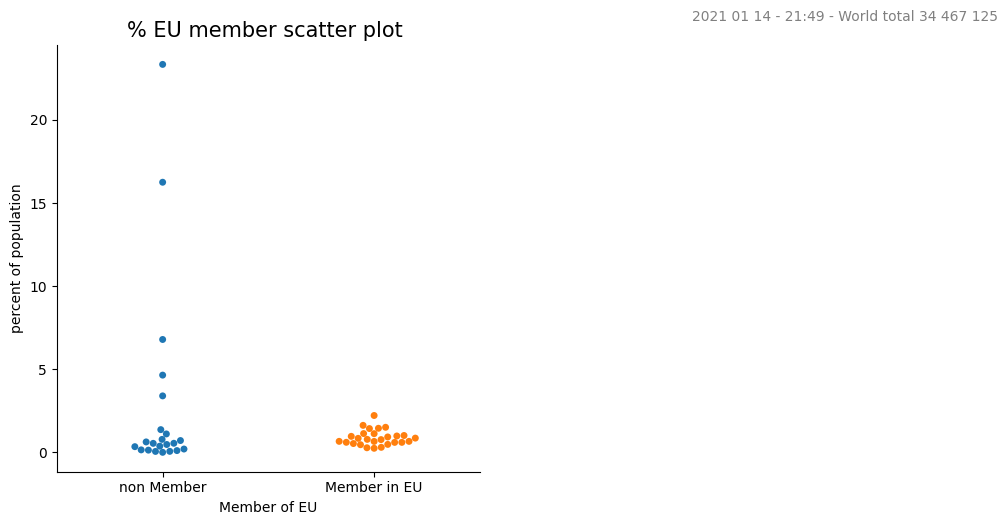

In [39]:

plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member EU", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% EU member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_EUCategorical_scatterplot.png",bbox_inches="tight")
plt.show() 

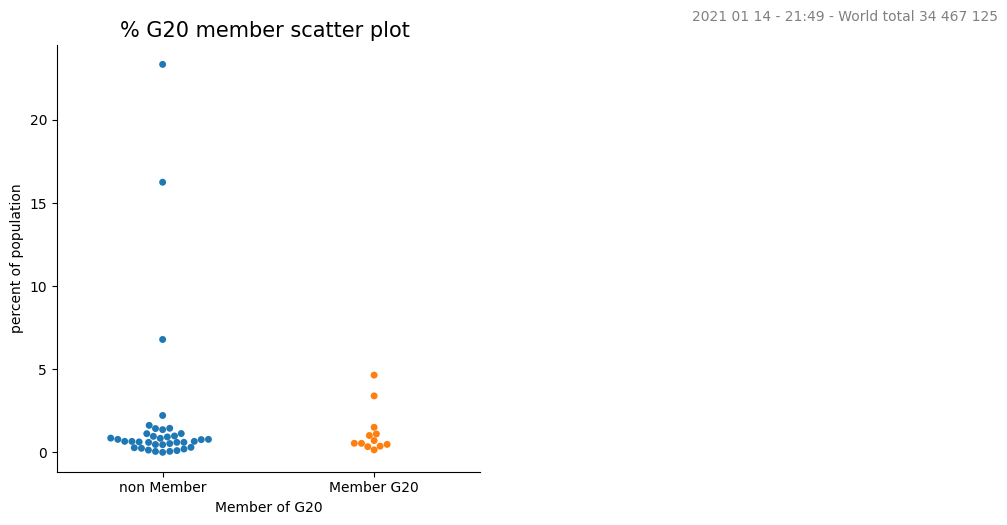

In [40]:
CountriesData["Member G20"] = CountriesData["G20"]
CountriesData["Member G20"] = CountriesData["G20"].astype(str)
CountriesData["Member G20"].replace({"1": "Member G20", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G20", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G20 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G20",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total '  + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_G20_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

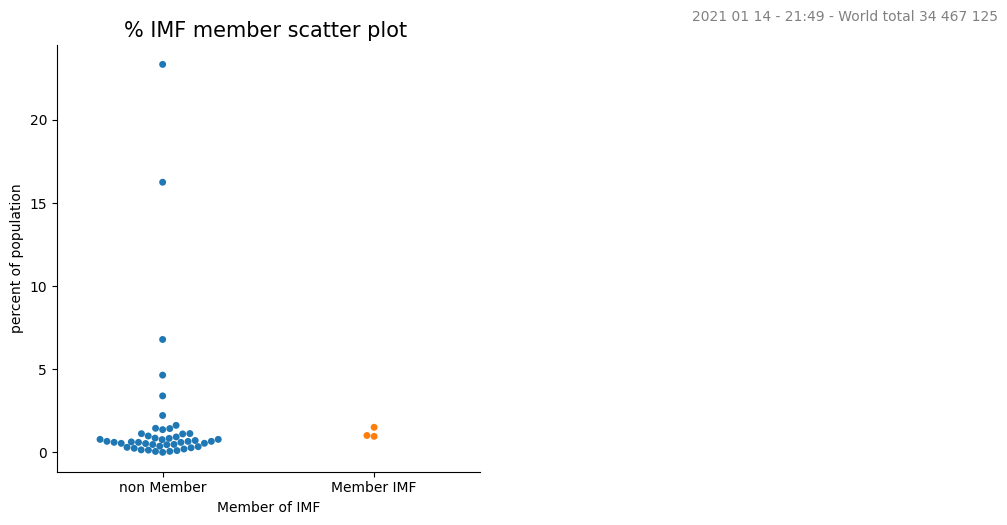

In [41]:
CountriesData["Member IMF"] = CountriesData["IMF"]
CountriesData["Member IMF"] = CountriesData["IMF"].astype(str)
CountriesData["Member IMF"].replace({"1": "Member IMF", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member IMF", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% IMF member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of IMF",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_IMF_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [42]:
CountriesDataEurope = CountriesData[CountriesData["continent"] == "Europe"]
europetotal_vaccinations_str = europetotal_vaccinations_str = '{:,}'.format(CountriesDataEurope.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape,europetotal_vaccinations_str)


34 467 125 (50, 3) 8 554 789


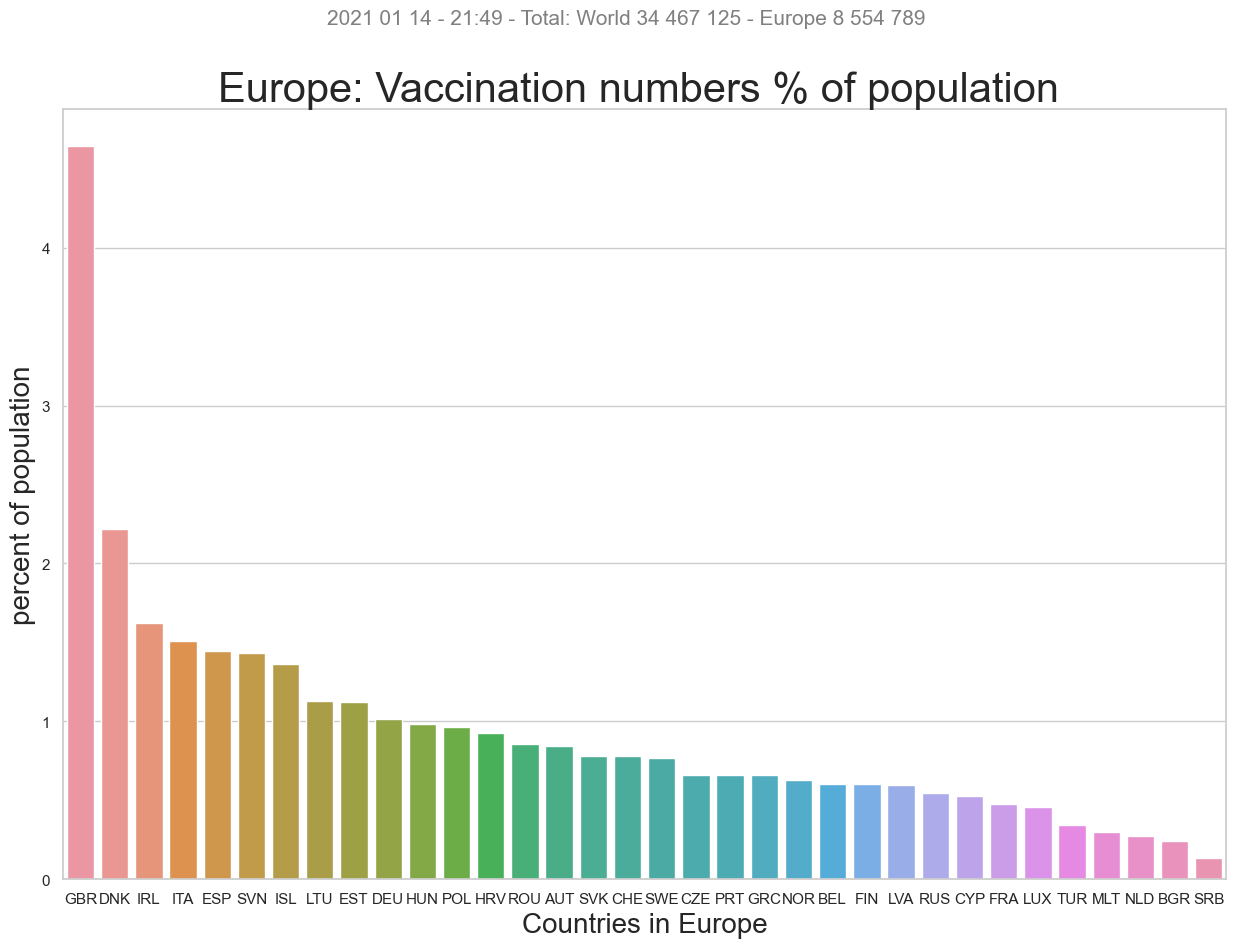

In [43]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesDataEurope). \
            set_title("Europe: Vaccination numbers % of population ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountryPopulation.png",bbox_inches="tight")
plt.show() 

In [44]:
#CountriesDataEurope

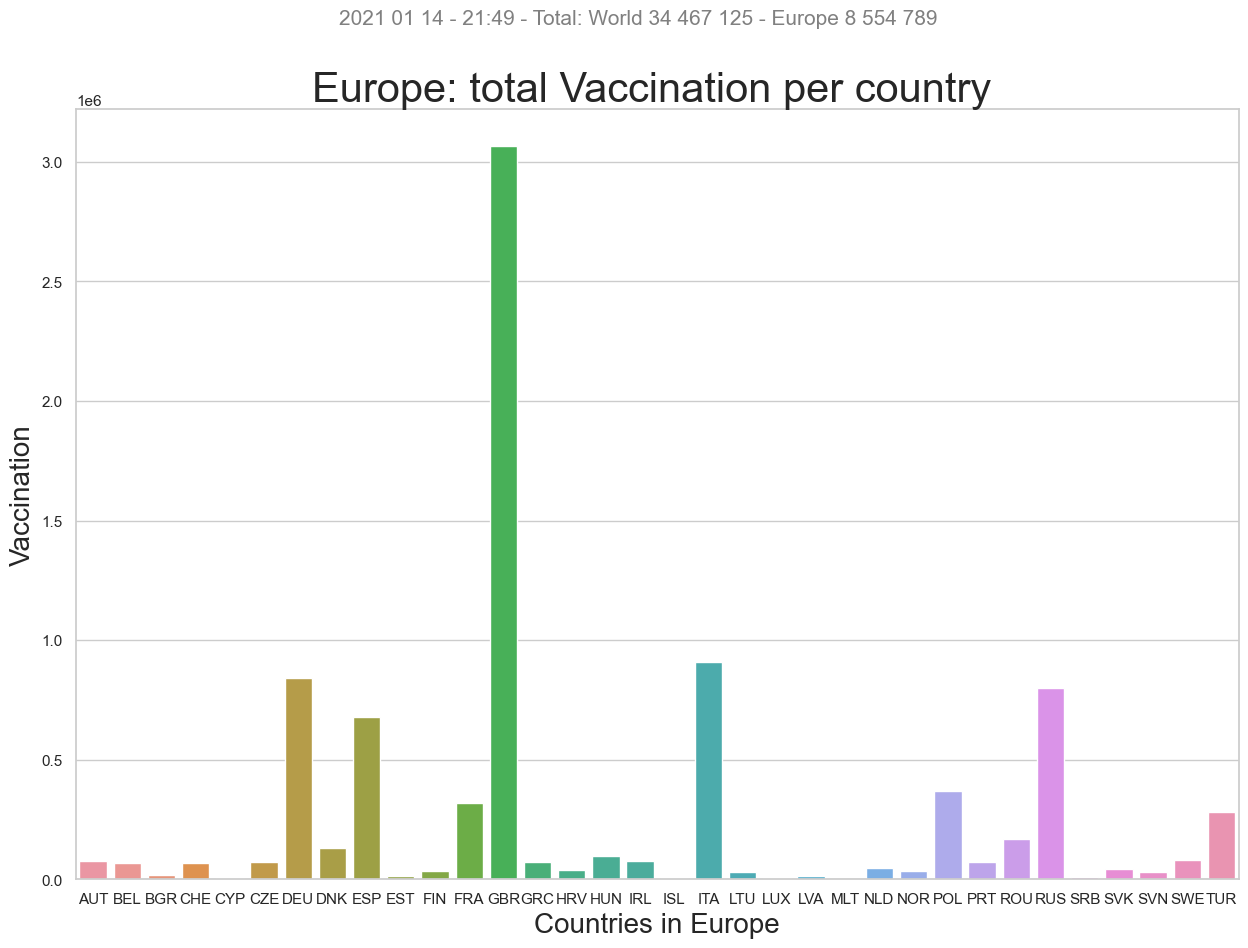

In [45]:
CountriesDataEurope = CountriesDataEurope.sort_values(by=['iso_code'],ascending=True)
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEurope). \
            set_title("Europe: total Vaccination per country ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [83]:
#All countries Europe also no reporting
WDpopulationEurope = WDpopulation[WDpopulation["continent"] == "Europe"]
 
#CountriesDataEuropeAll = CountriesDataEurope
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1")  
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1") \
        [{"memberEU_x","country_x","ISO3166_1","total_vaccinations","vaccinations_population_percent","genderH_x"}]

CountriesDataEuropeAll['total_vaccinations'] = CountriesDataEuropeAll['total_vaccinations'].fillna(0)
CountriesDataEuropeAll['vaccinations_population_percent'] = CountriesDataEuropeAll['vaccinations_population_percent'].fillna(0)
CountriesDataEuropeAll = CountriesDataEuropeAll.sort_values(by=['ISO3166_1'],ascending=True)
#CountriesDataEuropeAll["Member EU"] = CountriesDataEuropeAll["Member EU"].fillna("non Member")
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll.rename(columns = {'memberEU_x': 'memberEU'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'genderH_x': 'head_gender'}, inplace = True)
# name change 
CountriesDataEuropeAll
#CountriesDataEurope
#WDpopulationEurope 
#CountriesDataEurope

,total_vaccinations,vaccinations_population_percent,ISO3166_1,memberEU,head_gender,country_x
13,0.0,0.000000,ALB,non Member,male,Albania
37,0.0,0.000000,AND,non Member,male,Andorra
2,0.0,0.000000,ARM,non Member,male,Armenia
35,74100.0,0.841165,AUT,Member in EU,male,Austria
6,0.0,0.000000,AZE,non Member,male,Azerbaijan
1,68968.0,0.603320,BEL,Member in EU,male,Belgium
49,17038.0,0.243399,BGR,Member in EU,male,Bulgaria
9,0.0,0.000000,BIH,non Member,male,Bosnia and Herzegovina
16,0.0,0.000000,BLR,non Member,male,Belarus
30,66000.0,0.779587,CHE,non Member,male,Switzerland


## All countries on continent Europe

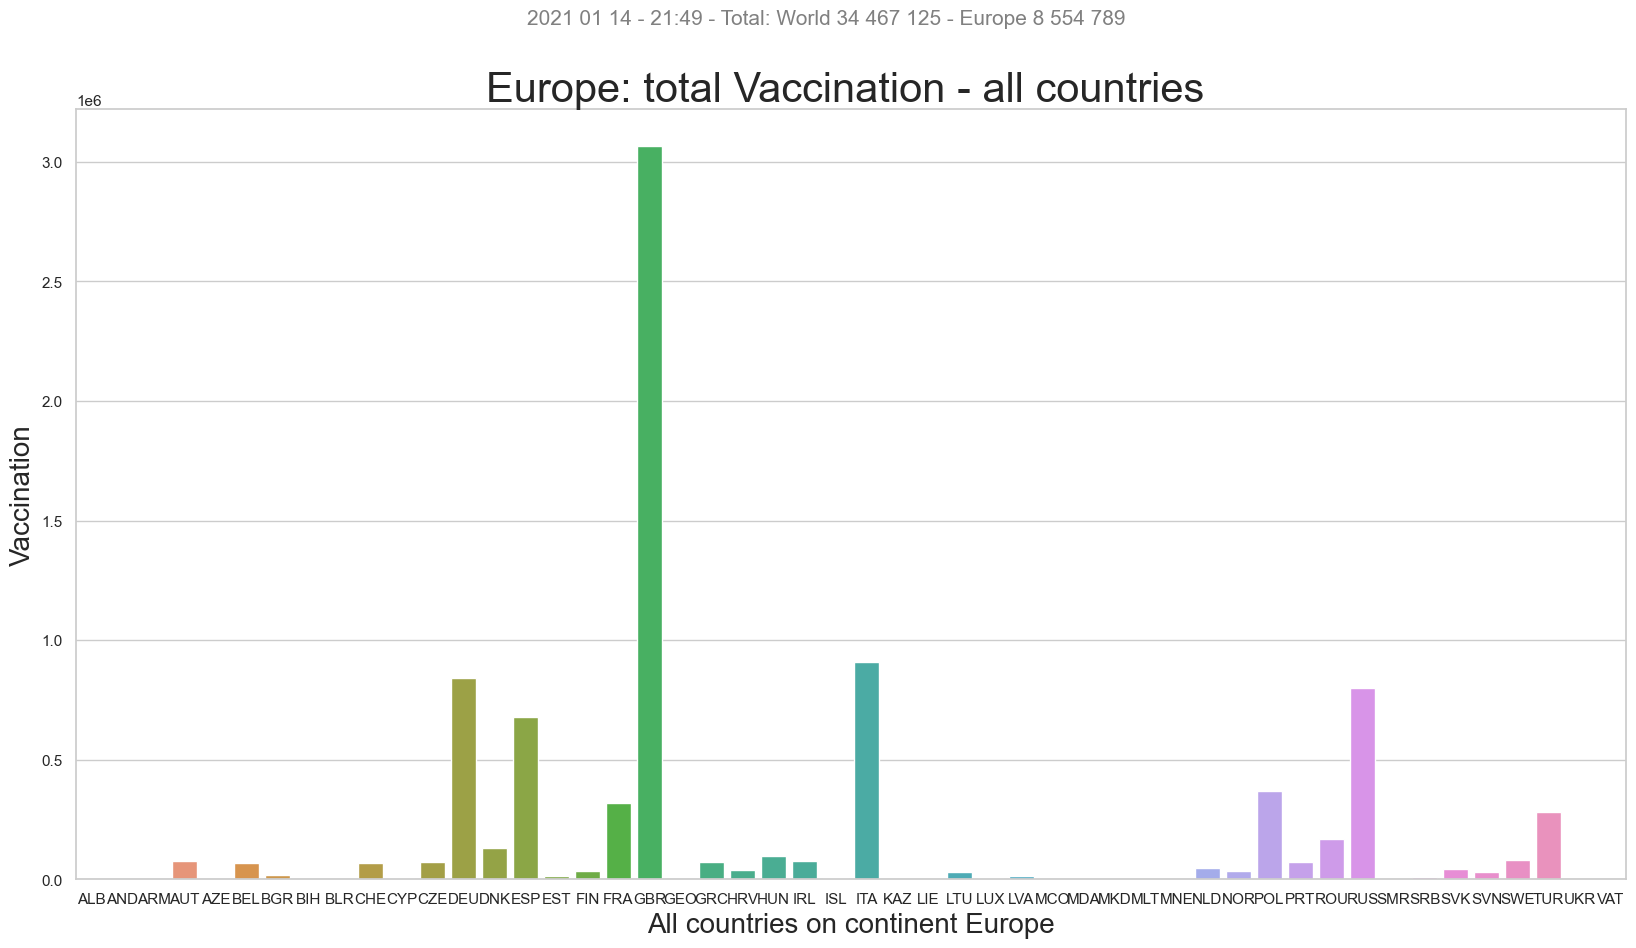

In [47]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEuropeAll). \
            set_title("Europe: total Vaccination - all countries ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All countries on continent Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/Corona_EuropeAllVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [48]:
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 13 to 39
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   total_vaccinations               50 non-null     float64
 1   vaccinations_population_percent  50 non-null     float64
 2   ISO3166_1                        50 non-null     object 
 3   memberEU                         50 non-null     object 
 4   head_gender                      50 non-null     object 
 5   country_x                        50 non-null     object 
dtypes: float64(2), object(4)
memory usage: 5.2+ KB


In [49]:
CountriesDataEuropeAll


,total_vaccinations,vaccinations_population_percent,ISO3166_1,memberEU,head_gender,country_x
13,0.0,0.000000,ALB,non Member,male,Albania
37,0.0,0.000000,AND,non Member,male,Andorra
2,0.0,0.000000,ARM,non Member,male,Armenia
35,74100.0,0.841165,AUT,Member in EU,male,Austria
6,0.0,0.000000,AZE,non Member,male,Azerbaijan
1,68968.0,0.603320,BEL,Member in EU,male,Belgium
49,17038.0,0.243399,BGR,Member in EU,male,Bulgaria
9,0.0,0.000000,BIH,non Member,male,Bosnia and Herzegovina
16,0.0,0.000000,BLR,non Member,male,Belarus
30,66000.0,0.779587,CHE,non Member,male,Switzerland


### Countries in EU

In [50]:
#CountriesDataEuropeEU[CountriesDataEuropeEU["ISO3166_1"] == "RUS"]
#CountriesDataEuropeEU
CountriesDataEuropeAll.rename(columns = {'country_x': 'country'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'ISO3166_1': 'ISO3166-1'}, inplace = True)

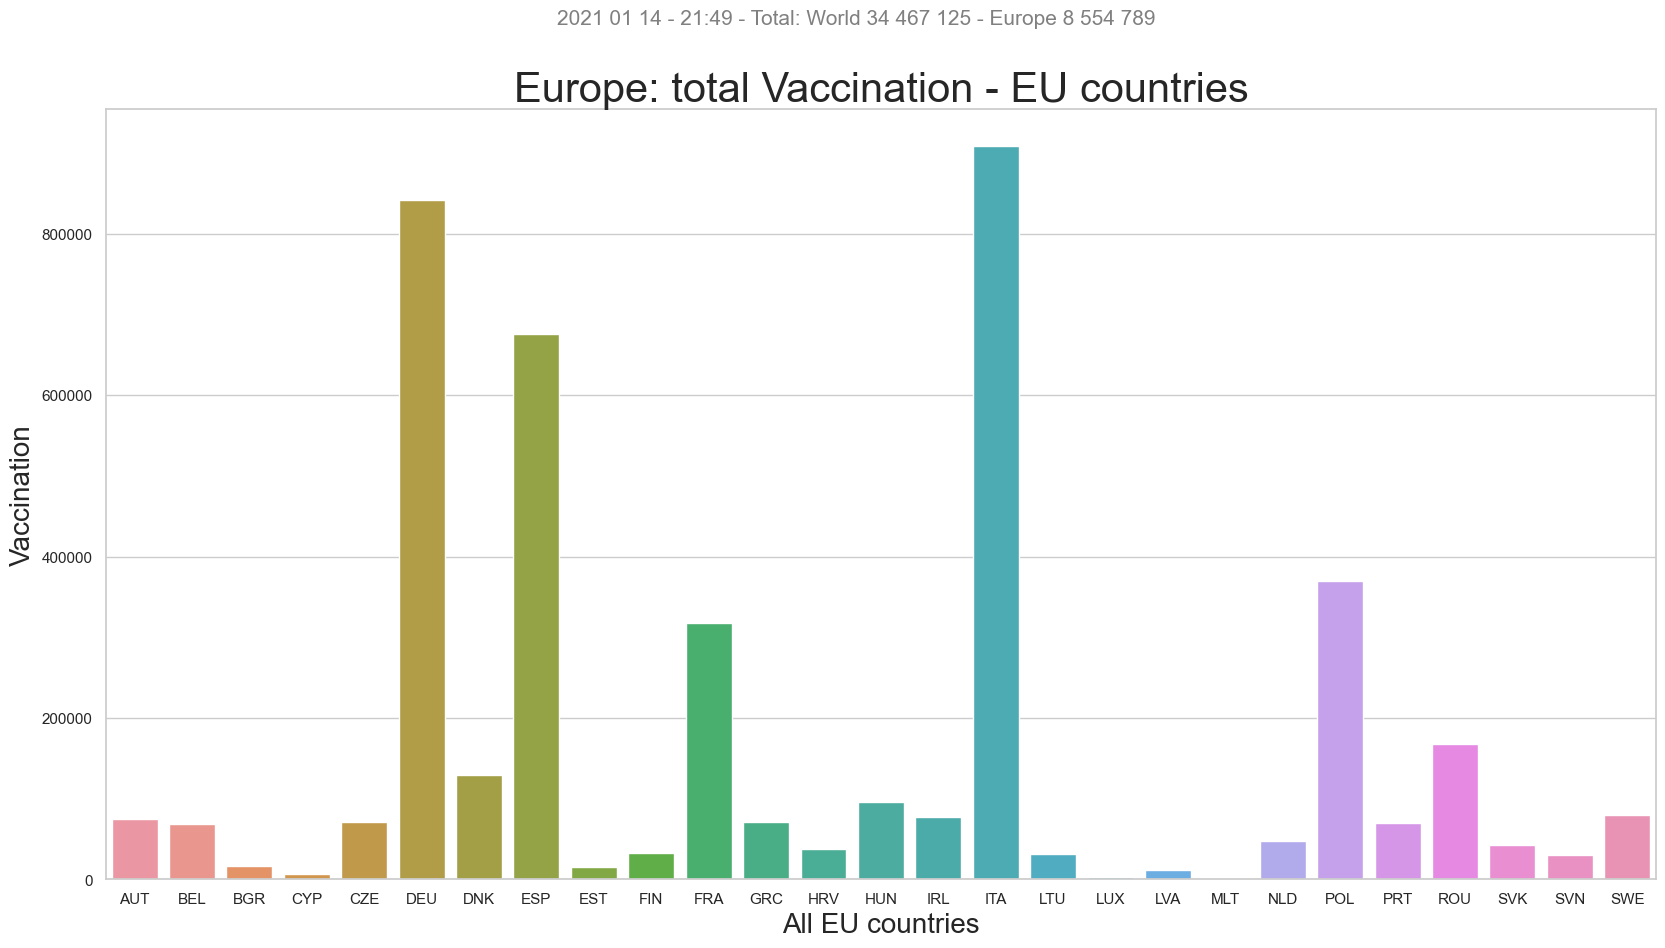

In [51]:
CountriesDataEuropeEU = CountriesDataEuropeAll[CountriesDataEuropeAll["memberEU"] == "Member in EU"]

plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166-1",y = "total_vaccinations", data=CountriesDataEuropeEU). \
            set_title("Europe: total Vaccination - EU countries", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All EU countries",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
#plt.annotate('actual group', xy=(x+0.2,y), xytext=(x+0.3, 300),
#             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=20, width=7))
#for p in ax.patches:
#    print(p)

plt.savefig("images/EU_VaccinationperCountry.png",bbox_inches="tight")
plt.show()

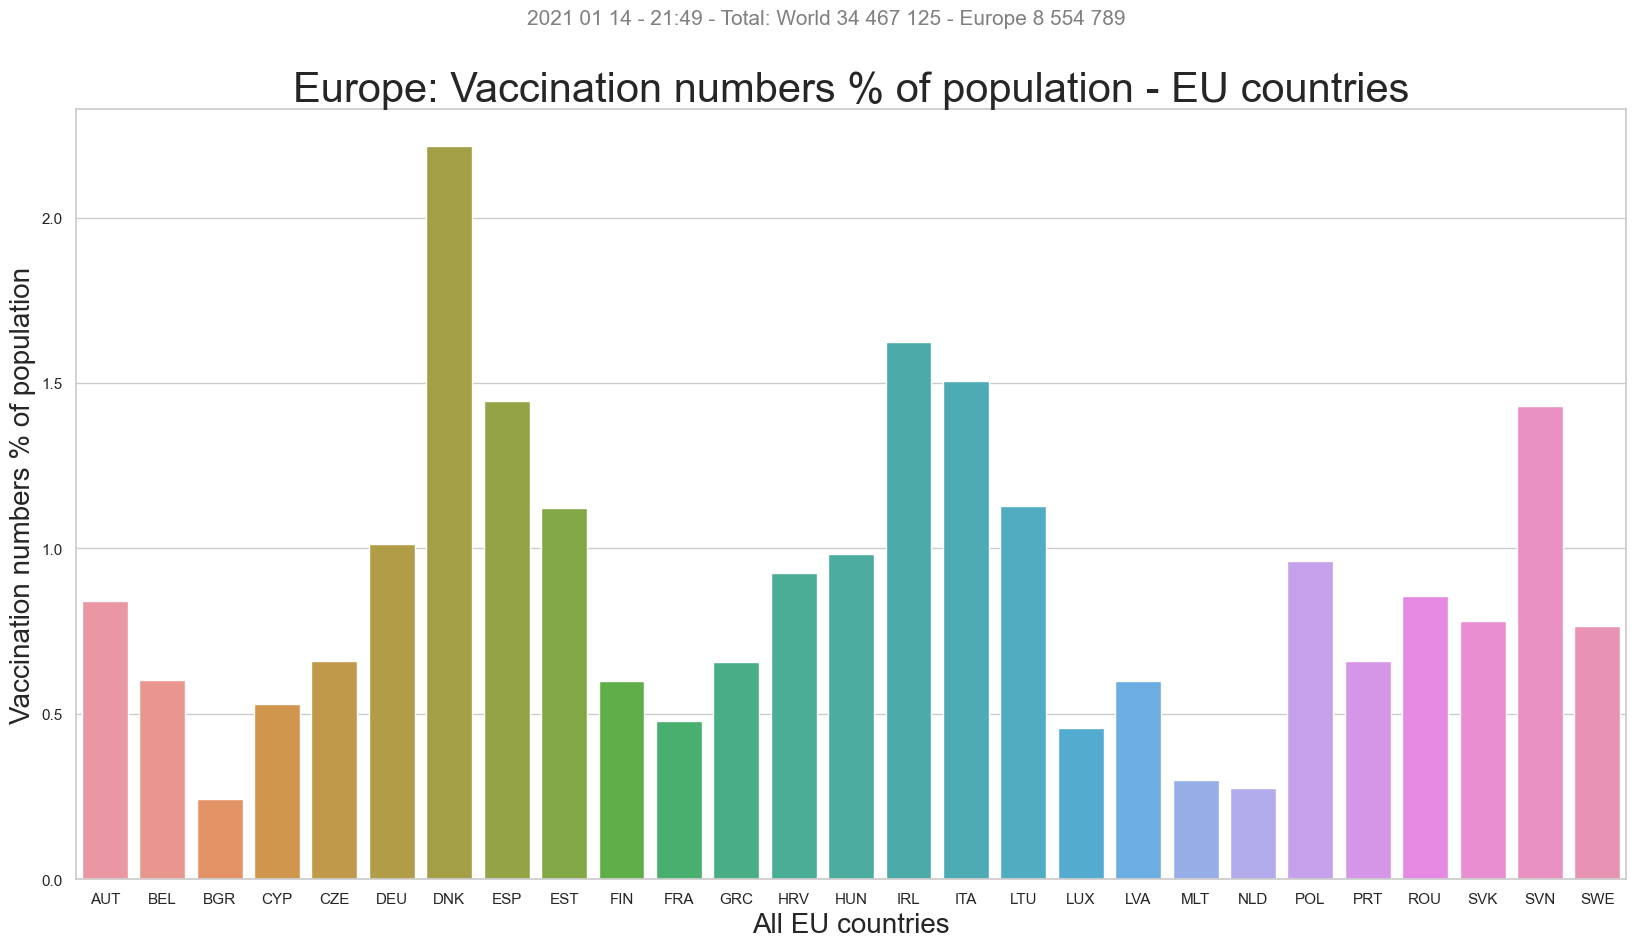

In [52]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166-1",y = "vaccinations_population_percent", data=CountriesDataEuropeEU). \
            set_title("Europe: Vaccination numbers % of population - EU countries", \
                      fontsize=30)
style = dict(size=10, color='gray')

plt.ylabel("Vaccination numbers % of population",fontsize=20)
plt.xlabel("All EU countries",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/EU_PercentVaccinationperCountry.png",bbox_inches="tight")
plt.show()

In [53]:
CountriesDataEuropeEU
#WDpopulationEuropeEU

,total_vaccinations,vaccinations_population_percent,ISO3166-1,memberEU,head_gender,country
35,74100.0,0.841165,AUT,Member in EU,male,Austria
1,68968.0,0.603320,BEL,Member in EU,male,Belgium
49,17038.0,0.243399,BGR,Member in EU,male,Bulgaria
14,6035.0,0.528845,CYP,Member in EU,male,Cyprus
19,70680.0,0.660935,CZE,Member in EU,male,Czech Republic
8,842455.0,1.013184,DEU,Member in EU,female,Germany
41,129170.0,2.216573,DNK,Member in EU,female,Denmark
27,676186.0,1.446912,ESP,Member in EU,male,Spain
21,14879.0,1.123096,EST,Member in EU,male,Estonia
36,33033.0,0.600486,FIN,Member in EU,female,Finland


### Countries in EU not delivering Vaccination statistics

In [54]:
CountriesDataEuropeAll[(CountriesDataEuropeAll["memberEU"] == "Member in EU") & \
(CountriesDataEuropeAll["total_vaccinations"] == 0 )][{"total_vaccinations","country","ISO3166-1","memberEU"}]

,ISO3166-1,memberEU,total_vaccinations,country


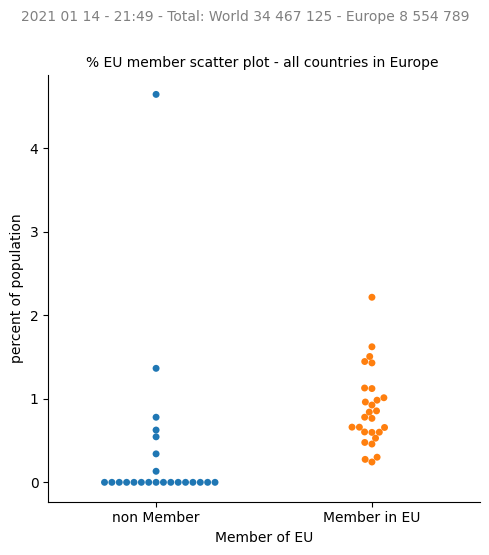

In [55]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="memberEU", y="vaccinations_population_percent", data=CountriesDataEuropeAll,kind="swarm",legend='brief')
plt.title("% EU member scatter plot - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_VaccinationperPopulation_AllEurope_scatterplot.png",bbox_inches="tight")
plt.show() 

In [56]:
#CountriesDataEuropeAll["head_gender"].astype('string')  
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 13 to 39
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   total_vaccinations               50 non-null     float64
 1   vaccinations_population_percent  50 non-null     float64
 2   ISO3166-1                        50 non-null     object 
 3   memberEU                         50 non-null     object 
 4   head_gender                      50 non-null     object 
 5   country                          50 non-null     object 
dtypes: float64(2), object(4)
memory usage: 5.2+ KB


In [57]:
#CountriesDataEuropeAll["vaccinations_population_percent].value_counts()

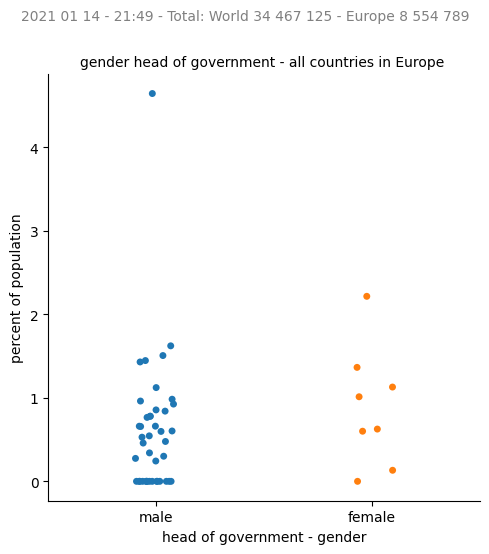

In [58]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="vaccinations_population_percent", data=CountriesDataEuropeAll)
plt.title("gender head of government - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_percent_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

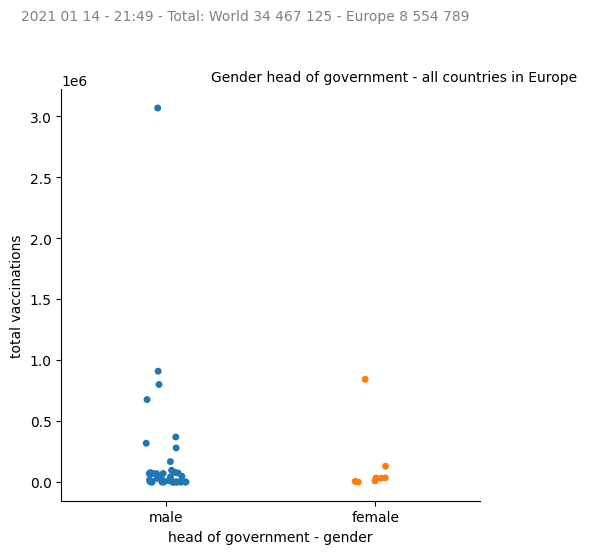

In [59]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="total_vaccinations", data=CountriesDataEuropeAll)
plt.title("Gender head of government - all countries in Europe ",fontsize=10,x=0.8)
plt.ylabel("total vaccinations",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

In [60]:
print(worldtotal_vaccinations_str, plotLatestCountries.shape, europetotal_vaccinations_str, CountriesDataEurope.shape)

34 467 125 (50, 3) 8 554 789 (34, 21)


In [61]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-14 21:50:16.683935
Time elapsed (hh:mm:ss.ms) 0:00:34.341987


In [62]:
#The Global State of Democracy Indices
#stata_democracy_indices = "https://www.idea.int/gsod-indices/sites/default/files/gsodi_pv_4.dta"
#df = pd.read_stata(stata_democracy_indices)